<a href="https://colab.research.google.com/github/Kgs-Mathaba/Anomaly_detection_using_AutoEncoders/blob/main/Anomaly_Detection_of_ECG_using_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['axes.grid'] = False

In [2]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip

--2022-03-31 19:46:37--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  3.41MB/s    in 3.0s    

2022-03-31 19:46:40 (3.41 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [3]:
!ls -alrt #directory list that shows all the files with the most recently modified files at the end

total 36800
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 4 root root     4096 Mar 23 14:21 .config
drwxr-xr-x 1 root root     4096 Mar 23 14:22 sample_data
drwxr-xr-x 1 root root     4096 Mar 31 19:46 ..
drwxr-xr-x 1 root root     4096 Mar 31 19:46 .


In [4]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [5]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [6]:
df = pd.read_csv('ecg_final.txt', sep='  ', header=None)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [7]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
5,1.0,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,...,1.214931,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134
6,1.0,-0.297161,-2.766635,-4.102185,-4.589669,-4.219357,-3.650443,-2.300518,-1.293917,-1.065658,...,0.594978,0.581779,0.684406,0.911651,0.979483,1.053458,0.974787,1.110407,1.288165,-0.823386
7,1.0,0.446769,-1.507397,-3.187468,-4.507462,-4.604201,-3.636115,-2.311604,-1.597727,-1.362450,...,1.088203,1.001306,1.292059,1.378667,1.014765,0.820793,1.034388,1.258433,0.961215,-0.999476
8,1.0,0.087631,-1.753490,-3.304473,-4.704657,-4.686415,-3.611817,-2.267268,-1.570893,-1.417790,...,1.575754,1.709046,2.142926,2.393528,1.925550,1.027624,0.573453,0.192971,-0.648683,-2.441068
9,1.0,-0.832281,-1.700368,-2.257301,-2.853671,-2.853301,-2.701487,-2.285726,-1.555512,-1.266622,...,2.028304,2.110504,2.203668,2.227544,2.171733,2.045938,2.126372,2.126852,1.679299,0.965814


In [8]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [9]:
df = df.add_prefix('c')

In [10]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [11]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [12]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [13]:
X = df.values # Keep the first column to be able to split according to label, will remove before training
y = df.values[:, 0:1]
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=111)

In [14]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data) # fit on training data
data_scaled 

MinMaxScaler()

In [15]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [16]:
train_data_scaled[:10]

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.54603684, 0.52609574, ..., 0.32938752, 0.41559349,
        0.4550684 ],
       [0.25      , 0.39336652, 0.39486685, ..., 0.37738131, 0.4863785 ,
        0.45174016],
       [0.25      , 0.66165586, 0.75136705, ..., 0.15203245, 0.2072104 ,
        0.30963706]])

In [17]:
test_data_scaled[:10]

array([[0.        , 0.51111741, 0.43489881, ..., 0.6249658 , 0.60768678,
        0.3698076 ],
       [0.25      , 0.5197631 , 0.58901577, ..., 0.39627694, 0.3318268 ,
        0.24251847],
       [0.25      , 0.62648979, 0.59723298, ..., 0.3331001 , 0.4585061 ,
        0.41617464],
       ...,
       [0.        , 0.51813456, 0.47150654, ..., 0.39023163, 0.49429113,
        0.36954615],
       [0.        , 0.62690402, 0.50451335, ..., 0.76708824, 0.63940936,
        0.33291581],
       [0.        , 0.451984  , 0.40307386, ..., 0.63398401, 0.61983081,
        0.42739558]])

In [18]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

In [19]:
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

In [20]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [21]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1644, 140)
(437, 140)


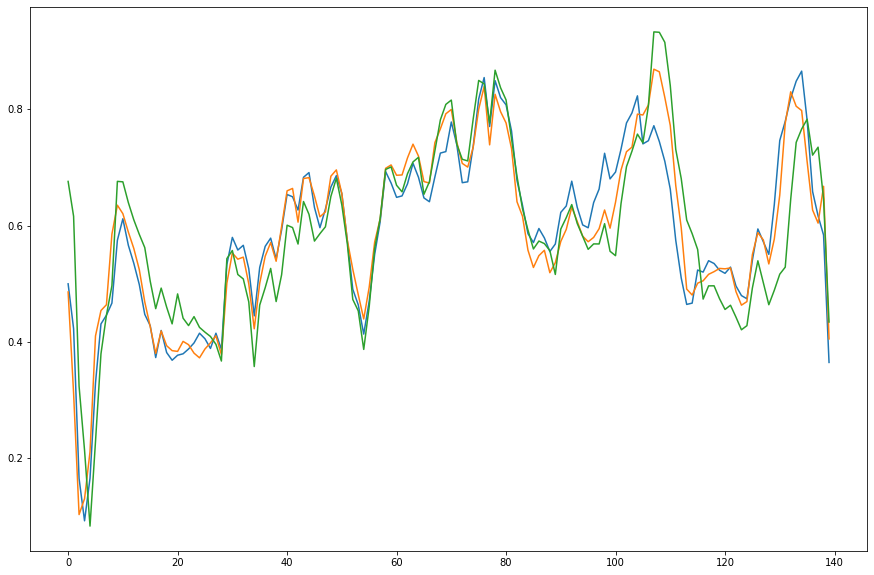

In [38]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

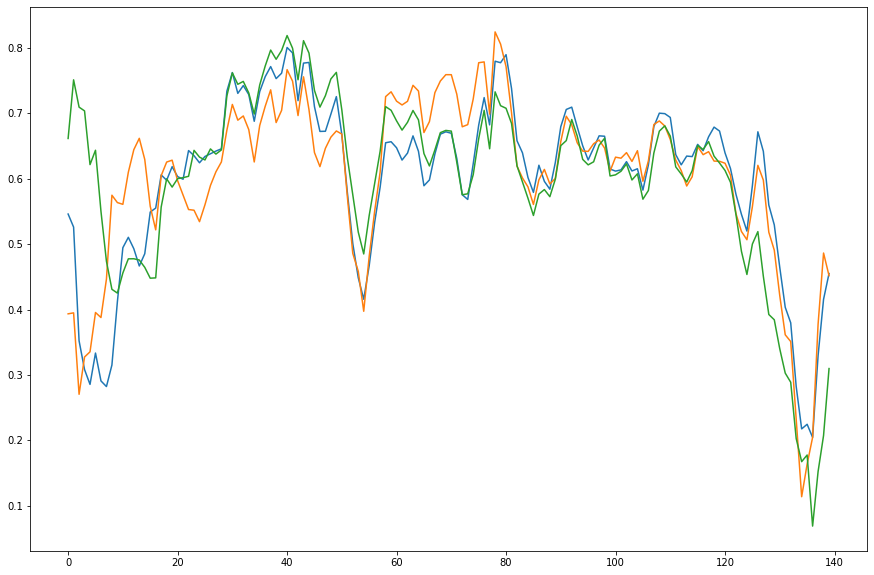

In [39]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(140, activation='sigmoid'))

In [29]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__() #initialize AutoEncoder as keras model
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
    

In [30]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

model.compile(optimizer='adam', loss='mae')

In [31]:
history = model.fit(normal_train_data, normal_train_data,
                    epochs=50,
                    batch_size=128,
                    validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]),
                    shuffle=True,
                    callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 2s 31ms/step - loss: 0.1349 - val_loss: 0.1263
Epoch 2/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0944 - val_loss: 0.0879
Epoch 3/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0573 - val_loss: 0.0773
Epoch 4/50
19/19 [==============================] - 0s 17ms/step - loss: 0.0493 - val_loss: 0.0766
Epoch 5/50
19/19 [==============================] - 0s 17ms/step - loss: 0.0481 - val_loss: 0.0758
Epoch 6/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0479 - val_loss: 0.0752
Epoch 7/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0477 - val_loss: 0.0752
Epoch 8/50
19/19 [==============================] - 0s 16ms/step - loss: 0.0475 - val_loss: 0.0743
Epoch 9/50
19/19 [==============================] - 0s 17ms/step - loss: 0.0473 - val_loss: 0.0736
Epoch 10/50
19/19 [==============================] - 0s 17ms/step - loss: 0.0471 - val_loss: 0.0735
Epoch 11/

In [32]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [33]:
encoder_out.shape

(563, 8)

In [34]:
decoder_out.shape

(563, 140)

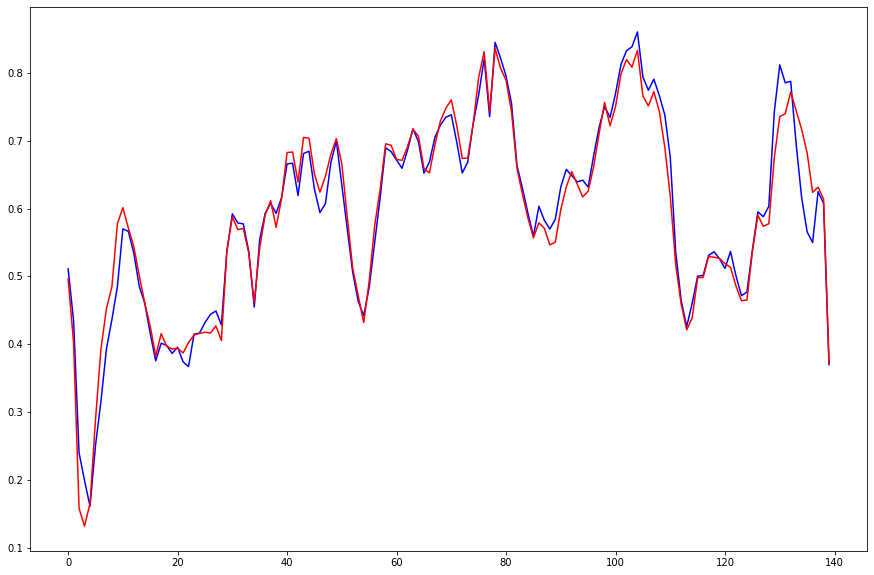

In [41]:
# Amazing! Very small reconstruction error
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')

In [42]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

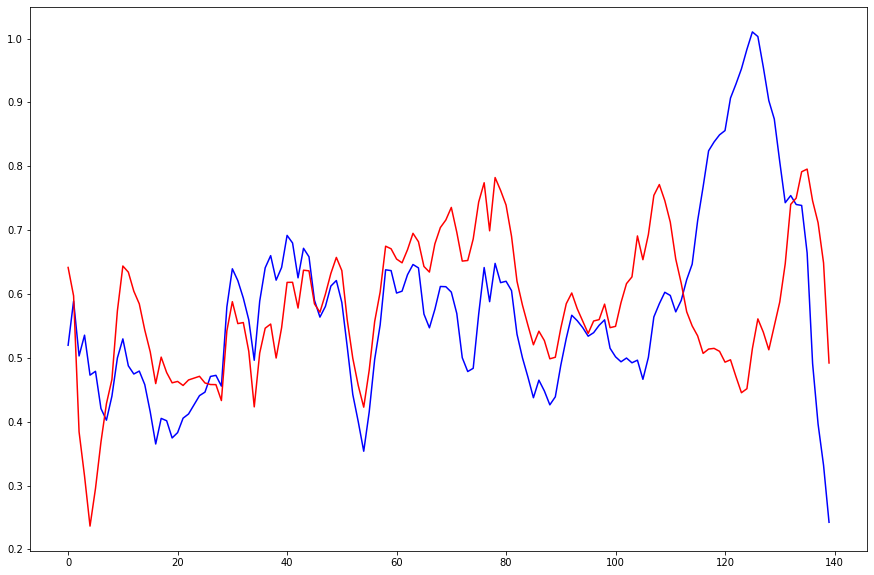

In [43]:
# Not good, very high reconstruction error
plt.plot(anomaly_test_data[0], 'b')
plt.plot(decoder_out_a[0], 'r')